In [14]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle
import os


In [ ]:
df = pd.read_csv("StudentsPerformance.xls")
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [ ]:
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)


df['pass'] = df['average_score'].apply(lambda x: 1 if x >= 50 else 0)

df.drop(columns=['math score', 'reading score', 'writing score'], inplace=True)

label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:

X = df.drop(columns=['pass'])
y = df['pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[ 27   0]
 [  0 173]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00       173

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:

os.makedirs("models", exist_ok=True)

with open("models/student_pass_predictor.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved successfully using pickle.")

Model saved successfully using pickle.


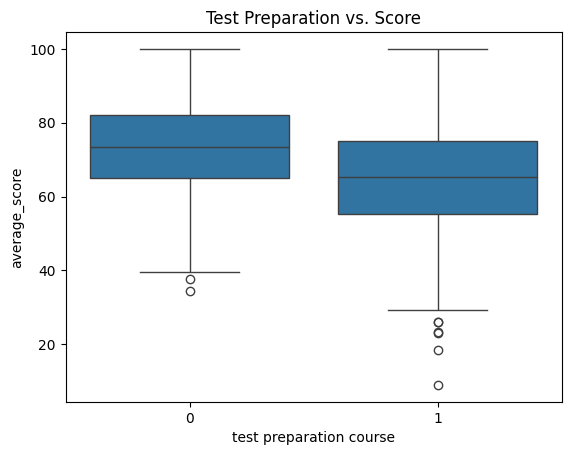

In [ ]:

sns.boxplot(x='test preparation course', y='average_score', data=df)
plt.title("Test Preparation vs. Score")
plt.show()
